Public Mindmaps Dataset: 13560 rows, 7 columns


,map_id,map_title,map_rating,map_category_name,idea_id,idea_parent_id,idea_title
0,116533,PFK/Risikomanagement,50,Business,116533,NaN,My first mindmap
1,116533,PFK/Risikomanagement,50,Business,116534,116533.0,Ideas for my novel ...
2,116533,PFK/Risikomanagement,50,Business,116535,116533.0,Welcome again!
3,116533,PFK/Risikomanagement,50,Business,116536,116535.0,We hope you\'ll have fun\nwith MindMeister ...
4,116533,PFK/Risikomanagement,50,Business,116537,116535.0,... and some great ideas too!


Dataset Information


,Number of unique mindmaps,Number of unique categories,Number of unique ratings
0,462,7,12


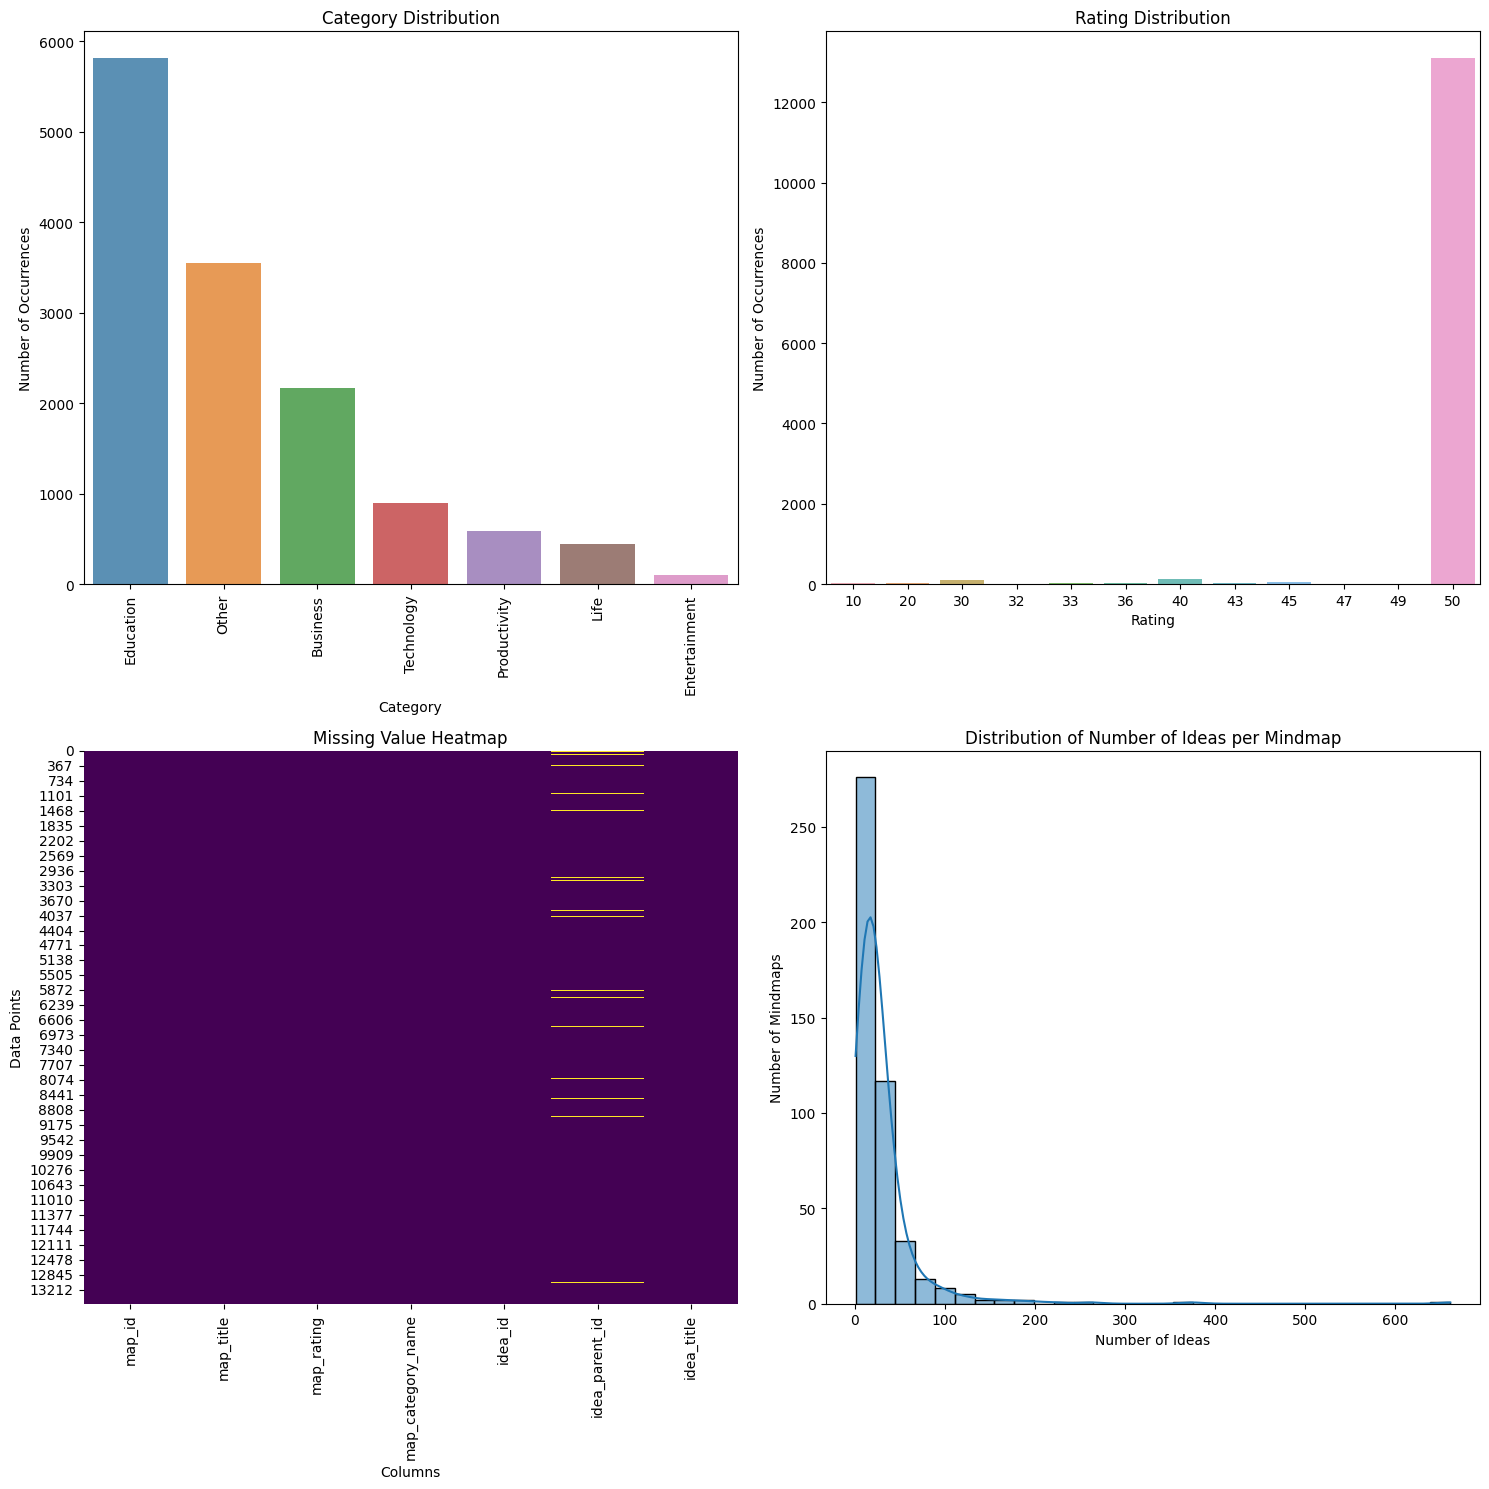

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# Load the dataset
data_path = "../data/raw/public_maps.csv"
data = pd.read_csv(data_path)


# Display the first few rows of the data
print(f"Public Mindmaps Dataset: {data.shape[0]} rows, {data.shape[1]} columns")
display(data.head())

# Prepare the data
info_data = {
    "Number of unique mindmaps": [data['map_id'].nunique()],
    "Number of unique categories": [data['map_category_name'].nunique()],
    "Number of unique ratings": [data['map_rating'].nunique()],
}

# Create a DataFrame
info_df = pd.DataFrame(info_data)

# Display the DataFrame
print("Dataset Information")
display(info_df)




# Get distributions
category_distribution = data['map_category_name'].value_counts()
rating_distribution = data['map_rating'].value_counts()
ideas_per_map = data['map_id'].value_counts()


# Create a new 2x2 figure
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Plot the category distribution
sns.barplot(x=category_distribution.index, y=category_distribution.values, alpha=0.8, ax=axs[0, 0])
axs[0, 0].set_title('Category Distribution')
axs[0, 0].set_ylabel('Number of Occurrences')
axs[0, 0].set_xlabel('Category')
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot the rating distribution
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, alpha=0.8, ax=axs[0, 1])
axs[0, 1].set_title('Rating Distribution')
axs[0, 1].set_ylabel('Number of Occurrences')
axs[0, 1].set_xlabel('Rating')

# Plot the missing value heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Missing Value Heatmap')
axs[1, 0].set_xlabel('Columns')
axs[1, 0].set_ylabel('Data Points')

# Plot histogram of number of ideas per mindmap
sns.histplot(ideas_per_map, bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Number of Ideas per Mindmap')
axs[1, 1].set_xlabel('Number of Ideas')
axs[1, 1].set_ylabel('Number of Mindmaps')

plt.tight_layout()
plt.show()
